# Force Board Calibration

The data for this calibration were taken on 25 January 2020. Both tension and compression measurements for 1000 pound Anyload 101NSGS 350 ohm wheatstone bridge load cell. Each power amplifier seems to have a slightly different offset independent of the load cell used (compare the linear fit data from data254, data254Port1, and data262), but the gain (or slope) seems to be more strongly correlated with the load cell used. Thus, the calibration data processed in this notebook works for the following port-to-transducer pairings:
* Port 1 - Transducer 1818000262
* Port 2 - Transducer 1818000254
* Port 3 - Transducer 1818000259

The csv with the same file name contains calibration data for PARSEC's load 
cells, as driven by the following hardware and software:

* 10 V rail from a LM317 linear regulator, outputting 10.20 V when under
  load from all three load cells (each is a 350 ohm wheatstone bridge).
  It's input was +-12 V from an ATX power supply.

* The forse [sic] sensor board designed in 2018 by Christine Yu and
  Alexi Garcia. It is based on an STM32F446VE microcontroller with
  12 bit ADCs. The load cell exitation is scaled to 3.3 V by an
  INA-125 instrumentation amplifier.

* Dumbells from the Caltech gym were used to apply known amounts of force.

* Tension measurements were performed by tying a loop around a pullup
  bar and hooking the load cell into it, and made a loop to hang from the
  other end of the load cell to hang dumbells from. The dumbells used for
  bicep curls were used.

* Compression measurements were performed by trying to place dumbells
  on top of the load cell sitting on the ground. Getting it to balance
  with any type of dumbell was difficult.
  
* ADC conversion values were obtained by triggering ADC conversions on
  loop, each value being the average of 2048 samples taken 1 ms apart.

These measurements were taken after a round of debugging on the force board
in which a cold solder joint was fixed on PA1, and a -12 V rail was run to the
negative supply pins on all INA-125 chips, fixing the non-linearity and
inability to amplify negative voltage (compression) signals properly.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [90]:
allData = pd.read_csv("load_cell_cal_2020-01-25.csv")

In [37]:
# Tension loads will be indicated by negative force.
signedData = allData
tensionSign = (allData["Direction"] == "Tension")
tensionSign[tensionSign == 1] = -1
tensionSign[tensionSign == 0] = 1
signedData["Force (lbs)"] *= tensionSign
signedData

,Load Cell S/N,Port No.,Direction,Force (lbs),ADC Conv.,Voltage (V)
0,1818000262,1,NaN,0.0,2013,1.624
1,1818000254,2,NaN,0.0,2002,1.620
2,1818000259,3,NaN,0.0,2044,1.646
3,1818000262,1,Tension,-22.5,2107,1.690
4,1818000262,1,Tension,-32.5,2142,1.717
5,1818000262,1,Tension,-50.0,2205,1.769
6,1818000262,1,Tension,-75.0,2289,1.837
7,1818000262,1,Tension,-100.0,2369,1.902
8,1818000262,1,Tension,-150.0,2530,2.041
9,1818000262,1,Compression,22.5,1945,1.561


In [22]:
allData.columns

Index(['Load Cell S/N', 'Port No.', 'Direction', 'Force (lbs)', 'ADC Conv.',
       'Voltage (V)'],
      dtype='object')

In [23]:
set(allData["Load Cell S/N"])

{1818000254, 1818000259, 1818000262}

In [87]:
data262 = signedData[(signedData["Load Cell S/N"] == 1818000262) &
                     (signedData["Port No."] == 1)]
data254 = signedData[(signedData["Load Cell S/N"] == 1818000254) &
                     (signedData["Port No."] == 2)]
data259 = signedData[(signedData["Load Cell S/N"] == 1818000259) &
                     (signedData["Port No."] == 3)]
data254Port1 = signedData[(signedData["Load Cell S/N"] == 1818000254) &
                          (signedData["Port No."] == 1)]

In [73]:
convToForce262 = linregress(data262["ADC Conv."], data262["Force (lbs)"])
print(f"Slope of lbs of force / ADC value: {convToForce262.slope}")
print(f"y-intercept in lbs:                {convToForce262.intercept}")
print(f"R-value                            {convToForce262.rvalue}")

Slope of lbs of force / ADC value: -0.2886338878297939
y-intercept in lbs:                583.8176122563541
R-value                            -0.9996432358110193


In [84]:
convToForce254 = linregress(data254["ADC Conv."], data254["Force (lbs)"])
print(f"Slope of lbs of force / ADC value: {convToForce254.slope}")
print(f"y-intercept in lbs:                {convToForce254.intercept}")
print(f"R-value                            {convToForce254.rvalue}")

Slope of lbs of force / ADC value: -0.2927559089141425
y-intercept in lbs:                586.410977401374
R-value                            -0.9993061083750274


In [89]:
convToForce254Port1 = linregress(data254Port1["ADC Conv."], data254Port1["Force (lbs)"])
print(f"Slope of lbs of force / ADC value: {convToForce254Port1.slope}")
print(f"y-intercept in lbs:                {convToForce254Port1.intercept}")
print(f"R-value                            {convToForce254Port1.rvalue}")

Slope of lbs of force / ADC value: -0.2918849282398535
y-intercept in lbs:                583.4360653294153
R-value                            -0.9991902715270793


In [85]:
convToForce259 = linregress(data259["ADC Conv."], data259["Force (lbs)"])
print(f"Slope of lbs of force / ADC value: {convToForce259.slope}")
print(f"y-intercept in lbs:                {convToForce259.intercept}")
print(f"R-value                            {convToForce259.rvalue}")

Slope of lbs of force / ADC value: -0.28066387801916076
y-intercept in lbs:                573.2856564566185
R-value                            -0.9996487603043891


In [74]:
voltToForce = linregress(data262["Voltage (V)"], data262["Force (lbs)"])
print(f"Slope lbs of force / volt: {voltToForce.slope}")
print(f"y-intercept in lbs:        {voltToForce.intercept}")
print(f"R-value                    {voltToForce.rvalue}")

Slope lbs of force / volt: -358.3738305752394
y-intercept in lbs:        582.4005587548974
R-value                    -0.9999314913057383


In [75]:
voltToConv = linregress(data262["Voltage (V)"], data262["ADC Conv."])
print(f"Slope ADC value / volt:   {voltToConv.slope}")
print(f"y-intercept in ADC value: {voltToConv.intercept}")
print(f"R-value                   {voltToConv.rvalue}")

Slope ADC value / volt:   1241.0331613538572
y-intercept in ADC value: 5.8849521525971795
R-value                   0.9998149610957535


In [48]:
import matplotlib.pyplot as plt

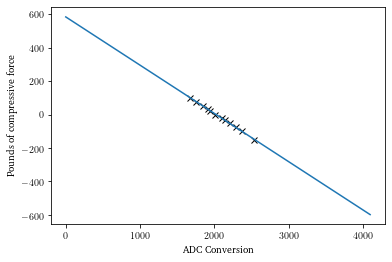

In [62]:
idealConv = np.linspace(0, 4095)
idealForceConv = (idealConv * convToForce262.slope) + convToForce262.intercept

plt.figure()
plt.plot(data262['ADC Conv.'], data262['Force (lbs)'], "kx")
plt.plot(idealConv, idealForceConv)
plt.xlabel("ADC Conversion")
plt.ylabel("Pounds of compressive force")
plt.savefig("conv-force_plot.pdf")
plt.show()

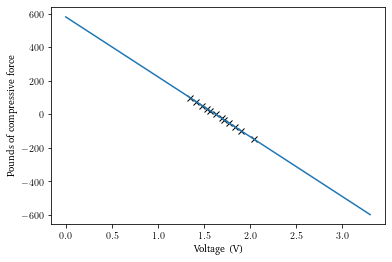

In [76]:
idealVoltage = np.linspace(0, 3.3)
idealForceVolt = (idealVoltage * voltToForce.slope) + voltToForce.intercept

plt.figure()
plt.plot(data262['Voltage (V)'], data262['Force (lbs)'], "kx")
plt.plot(idealVoltage, idealForceVolt)
plt.xlabel("Voltage (V)")
plt.ylabel("Pounds of compressive force")
plt.savefig("volt-force_plot.pdf")
plt.show()

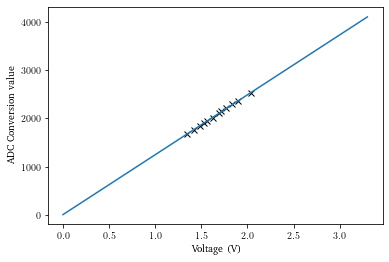

In [78]:
# Graph ADC value vs. the actual voltage

idealConvVolt = (idealVoltage * voltToConv.slope) + voltToConv.intercept

plt.figure()
plt.plot(data262['Voltage (V)'], data262['ADC Conv.'], "kx")
plt.plot(idealVoltage, idealConvVolt)
plt.xlabel("Voltage (V)")
plt.ylabel("ADC Conversion value")
plt.savefig("volt-force_plot.pdf")
plt.show()